## Task 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def system(n: int, alpha: float):
    
    A = np.zeros((n, n))
    f = np.zeros((n, 1))
    
    
    for i in range(n):
        A[i,i] = 2.
        if i > 0:
            A[i,i-1] = -1 + alpha
        if i < n - 1:
            A[i,i+1] = -1 - alpha
            
    f = np.zeros(n) 
    f[0] = 1 - alpha
    f[n-1] = 1 + alpha
    
    return (A, f)
    
system(4, 1)

(array([[ 2., -2.,  0.,  0.],
        [ 0.,  2., -2.,  0.],
        [ 0.,  0.,  2., -2.],
        [ 0.,  0.,  0.,  2.]]),
 array([0., 0., 0., 2.]))

In [73]:
def jacobi_solve(A, f, eps = 1e-6, MAX_ITER = 100000, x_prev = None):
    
    n = f.shape[0]
    
    if np.all(x_prev==None): 
        x_prev = np.ones(f.shape)*2
    x_curr = np.copy(x_prev)
    # print(x_prev)
    
    r = []
    num_k = []
    
    for k in range(1, MAX_ITER + 1):
        
        x_prev[:] = x_curr[:]
        
        for i in range(n):
            x_curr[i] = 1./A[i, i]*(f[i] - A[i, 0:i] @ x_prev[0:i] - A[i, i+1:] @ x_prev[i+1:])
        
        if np.sum((x_curr - x_prev)**2) < eps**2:
            break

        r.append(np.sum((x_curr - x_prev)**2))
        num_k.append(k)
        

    if k == MAX_ITER:
        print("Didn't converge!Q!11!!1")
    
    return x_curr, r, num_k

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


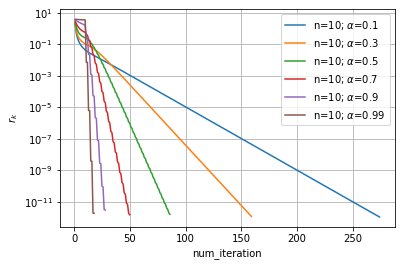

In [70]:
n = 10
alphas = [0.1,0.3,0.5,0.7,0.9,0.99]
fig = plt.figure()
for a_ in alphas:
    x0 = 3*np.ones(n)
    A, f = system(n, a_)
    x_curr, r, num_k = jacobi_solve(A, f, x_prev=x0)
    plt.semilogy(num_k, r, label=f'n={n}; $\\alpha$={a_}')
plt.grid()
plt.legend()
plt.xlabel('num_iteration')
plt.ylabel('$r_k$')
plt.show()

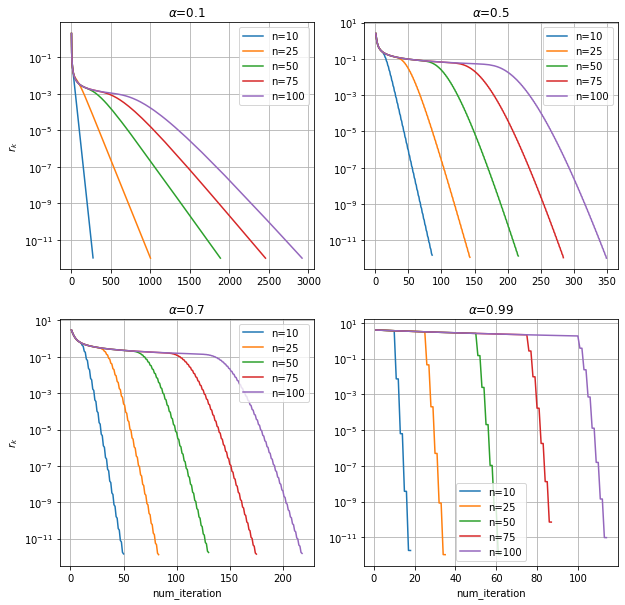

In [83]:
n = [10, 25, 50, 75, 100]
alphas = [0.1,0.5,0.7,0.99]
fig, axs = plt.subplots(2,2,figsize=(10,10))
for i_, a_ in enumerate(alphas):
    i = i_//2
    j = i_%2
    for n_ in n:
        A, f = system(n_, a_)
        x0 = 3*np.ones(n_)
        x_curr, r, num_k = jacobi_solve(A, f, x_prev=x0)
        axs[i, j].semilogy(num_k, r, label=f'n={n_}')
        axs[i, j].set_title(f'$\\alpha$={a_}')
        axs[i, j].grid()
        axs[i, j].legend()
        if i == 1: axs[i, j].set_xlabel('num_iteration')
        if j == 0: axs[i, j].set_ylabel('$r_k$')
plt.show()

## Task 2

In [79]:
def zeydel_solve(A, f, eps = 1e-6, MAX_ITER = 100000, x_prev = None):
    
    n = f.shape[0]
    # print(n)
    
    if np.all(x_prev==None): 
        x_prev = 2*np.ones(f.shape)
    # print(x_prev)
    x_prev = x_prev.reshape((-1, 1))
    x_curr = np.copy(x_prev)

    U = (np.triu(np.ones(A.shape))-np.diag(np.ones(A.shape[0])))*A
    L = (np.tril(np.ones(A.shape))-np.diag(np.ones(A.shape[0])))*A
    D = (np.diag(np.ones(A.shape[0])))*A

    A1 = -np.linalg.inv(L+D)@U
    A2 = np.linalg.inv(L+D)@(f.reshape((-1, 1)))
    # print(A1.shape)
    # print(A2.shape)
    # print(x_prev.shape)

    r = []
    num_k = []
    
    for k in range(1, MAX_ITER + 1):
        
        x_prev[:] = x_curr[:] # Это важно, да

        x_curr = A1@(x_prev.reshape((-1, 1))) + A2

        if np.sum((x_curr - x_prev)**2) < eps**2:
            break
        
        r.append(np.sum((x_curr - x_prev)**2))
        num_k.append(k)
        

    if k == MAX_ITER:
        print("Didn't converge!Q!11!!1")
    
    return x_curr, r, num_k

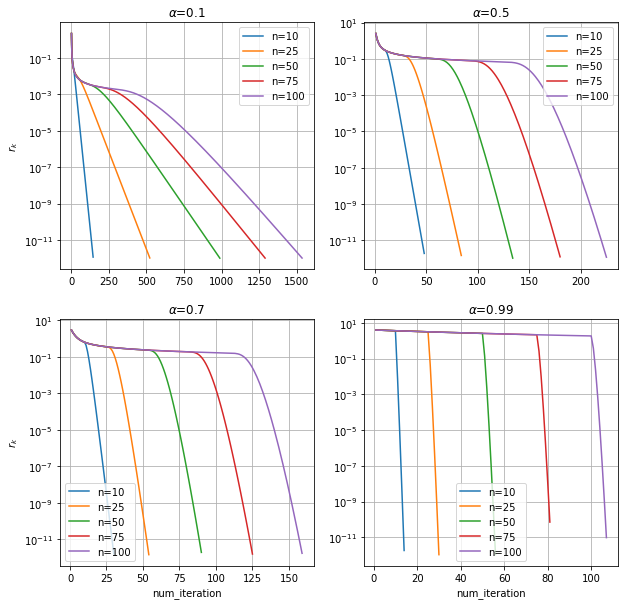

In [82]:
n = [10, 25, 50, 75, 100]
alphas = [0.1,0.5,0.7,0.99]
fig, axs = plt.subplots(2,2,figsize=(10,10))
for i_, a_ in enumerate(alphas):
    i = i_//2
    j = i_%2
    for n_ in n:
        x0 = 3*np.ones(n_)
        A, f = system(n_, a_)
        x_curr, r, num_k = zeydel_solve(A, f, x_prev=x0)
        axs[i, j].semilogy(num_k, r, label=f'n={n_}')
        axs[i, j].set_title(f'$\\alpha$={a_}')
        axs[i, j].grid()
        axs[i, j].legend()
        if i == 1: axs[i, j].set_xlabel('num_iteration')
        if j == 0: axs[i, j].set_ylabel('$r_k$')
plt.show()

## Task 4
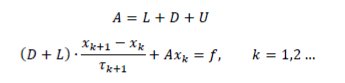

In [87]:
def compare_solve(A, f, tau, eps = 1e-6, MAX_ITER = 100000, x_prev = None):
    
    n = f.shape[0]
    # print(n)
    
    if np.all(x_prev==None): 
        x_prev = 2*np.ones(f.shape)
    # print(x_prev)
    x_prev = x_prev.reshape((-1, 1))
    x_curr = np.copy(x_prev)

    U = (np.triu(np.ones(A.shape))-np.diag(np.ones(A.shape[0])))*A
    L = (np.tril(np.ones(A.shape))-np.diag(np.ones(A.shape[0])))*A
    D = (np.diag(np.ones(A.shape[0])))*A

    A1 = -np.linalg.inv(L+D)@A*tau+np.eye(n, n)
    A2 = np.linalg.inv(L+D)@(f.reshape((-1, 1)))*tau

    r = []
    num_k = []
    
    for k in range(1, MAX_ITER + 1):
        
        x_prev[:] = x_curr[:] # Это важно, да

        x_curr = A1@(x_prev.reshape((-1, 1))) + A2

        if np.sum((x_curr - x_prev)**2) < eps**2:
            break
        
        r.append(np.sum((x_curr - x_prev)**2))
        num_k.append(k)
        

    if k == MAX_ITER:
        print("Didn't converge!Q!11!!1")
    
    return x_curr, r, num_k

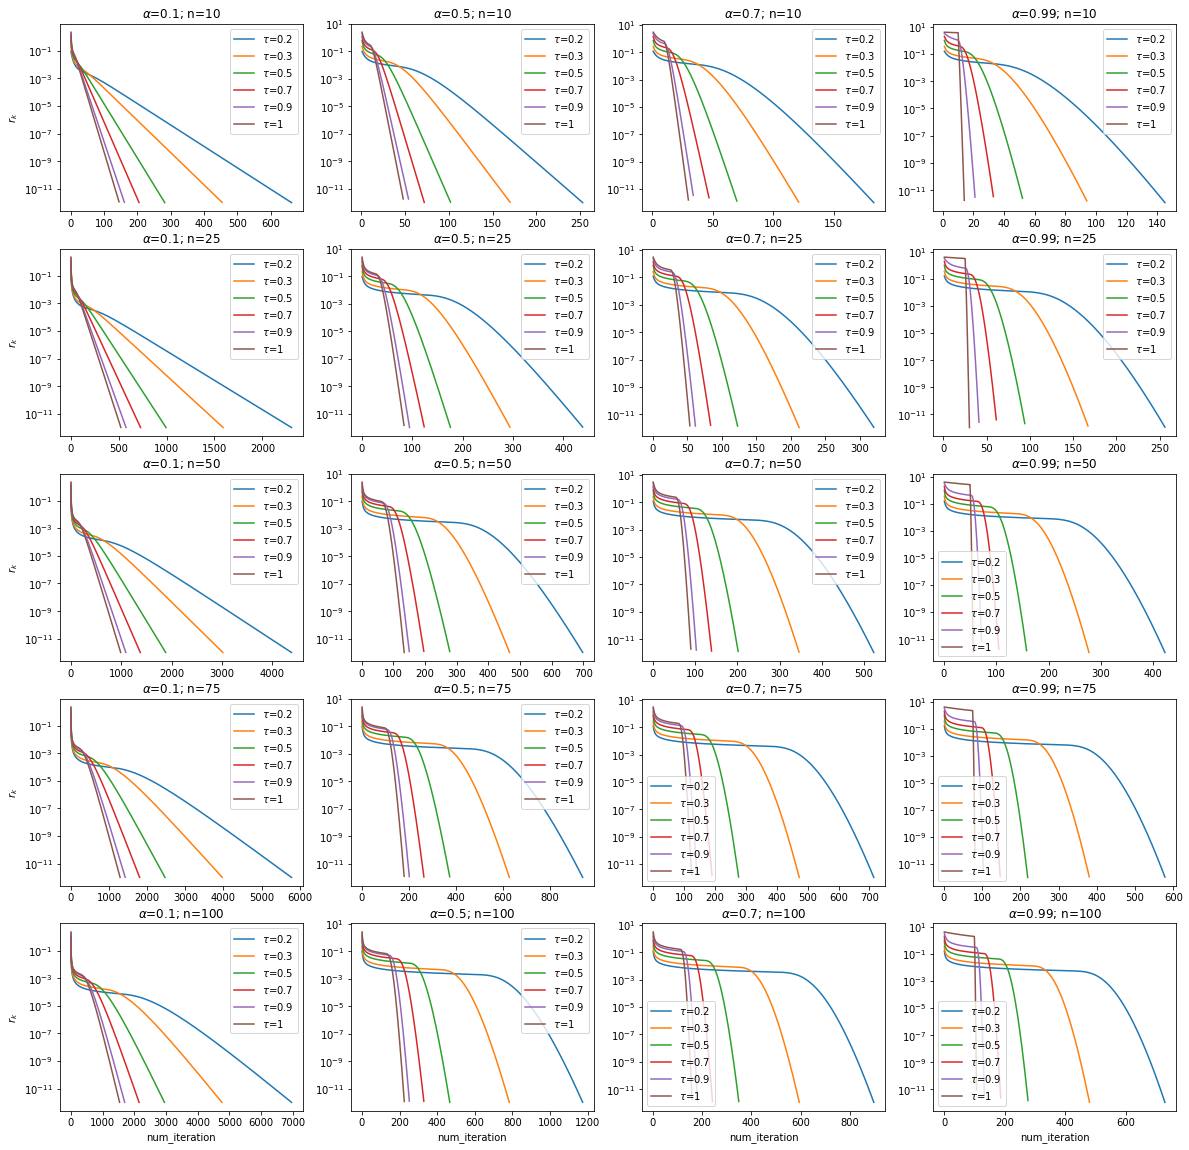

In [96]:
n = [10, 25, 50, 75, 100]
alphas = [0.1,0.5,0.7,0.99]
taus = [0.2,0.3,0.5,0.7,0.9,1]
fig, axs = plt.subplots(len(n), len(alphas),figsize=(20,20))
for j, a_ in enumerate(alphas):
    for i, n_ in enumerate(n):
        for tau in taus:
            x0 = 3*np.ones(n_)
            A, f = system(n_, a_)
            x_curr, r, num_k = compare_solve(A, f, tau, x_prev=x0)
            axs[i, j].semilogy(num_k, r, label=f'$\\tau$={tau}')
            axs[i, j].set_title(f'$\\alpha$={a_}; n={n_}')
            axs[i, j].grid()
            axs[i, j].legend()
            if i == len(n)-1: axs[i, j].set_xlabel('num_iteration')
            if j == 0: axs[i, j].set_ylabel('$r_k$')
plt.show()

## Task 5
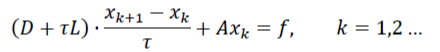

In [91]:
def compare2_solve(A, f, tau, eps = 1e-6, MAX_ITER = 100000, x_prev = None):
    
    n = f.shape[0]
    # print(n)
    
    if np.all(x_prev==None): 
        x_prev = 2*np.ones(f.shape)
    # print(x_prev)
    x_prev = x_prev.reshape((-1, 1))
    x_curr = np.copy(x_prev)

    U = (np.triu(np.ones(A.shape))-np.diag(np.ones(A.shape[0])))*A
    L = (np.tril(np.ones(A.shape))-np.diag(np.ones(A.shape[0])))*A
    D = (np.diag(np.ones(A.shape[0])))*A

    A1 = -np.linalg.inv(tau*L+D)@A*tau+np.eye(n, n)
    A2 = np.linalg.inv(tau*L+D)@(f.reshape((-1, 1)))*tau

    r = []
    num_k = []
    
    for k in range(1, MAX_ITER + 1):
        
        x_prev[:] = x_curr[:] # Это важно, да

        x_curr = A1@(x_prev.reshape((-1, 1))) + A2

        if np.sum((x_curr - x_prev)**2) < eps**2:
            break
        
        r.append(np.sum((x_curr - x_prev)**2))
        num_k.append(k)
        

    if k == MAX_ITER:
        print("Didn't converge!Q!11!!1")
    
    return x_curr, r, num_k

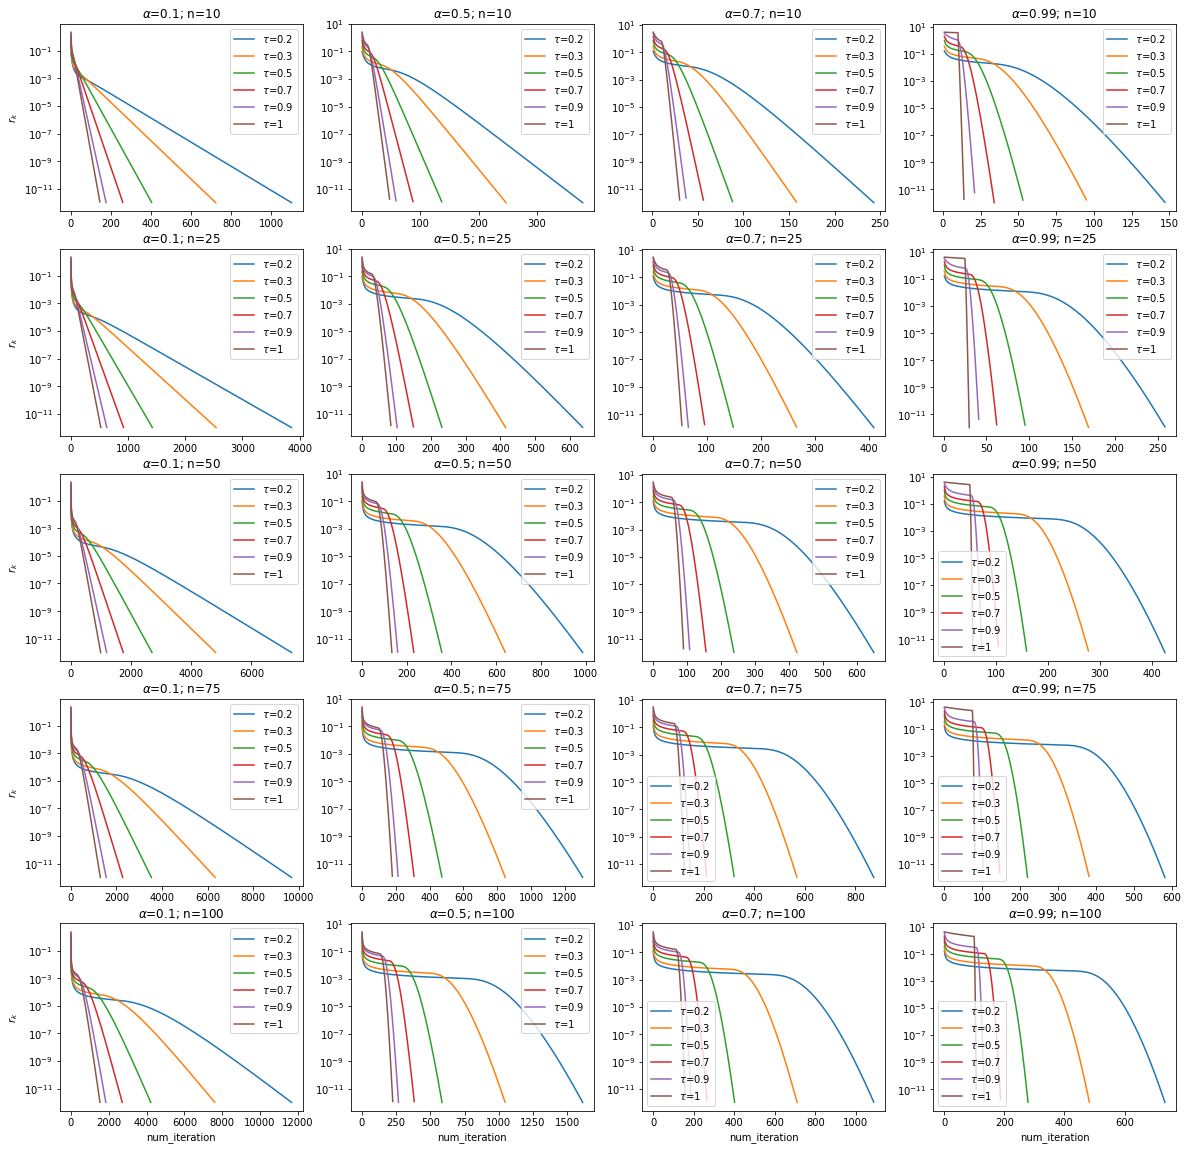

In [95]:
n = [10, 25, 50, 75, 100]
alphas = [0.1,0.5,0.7,0.99]
taus = [0.2,0.3,0.5,0.7,0.9,1]
fig, axs = plt.subplots(len(n), len(alphas),figsize=(20,20))
for j, a_ in enumerate(alphas):
    for i, n_ in enumerate(n):
        for tau in taus:
            x0 = 3*np.ones(n_)
            A, f = system(n_, a_)
            x_curr, r, num_k = compare2_solve(A, f, tau, x_prev=x0)
            axs[i, j].semilogy(num_k, r, label=f'$\\tau$={tau}')
            axs[i, j].set_title(f'$\\alpha$={a_}; n={n_}')
            axs[i, j].grid()
            axs[i, j].legend()
            if i == len(n)-1: axs[i, j].set_xlabel('num_iteration')
            if j == 0: axs[i, j].set_ylabel('$r_k$')
plt.show()